<a href="https://colab.research.google.com/github/Ethy17/CPE019-CPE32S9/blob/main/Hands_on_Activity_5_2_Build_and_Apply_Multilayer_Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*   Dataset - https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification
*   Problem to Solve - Esimate Price of Mobile Phone

In [126]:
# Importing Libraries
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [127]:
DS = pd.read_csv('/content/train.xls')

In [128]:
# Loading the Dataset
ActDS = tf.keras.datasets.mnist.load_data(path='/content/train.xls')
(x_train, y_train), (x_test, y_test) = ActDS

A local file was found, but it seems to be incomplete or outdated because the auto file hash does not match the original value of 731c5ac602752760c8e48fbffcf8c3b850d9dc2a2aedcf2cc48468fc17b673d1 so we will re-download the data.
11490434/11490434 [==============================] - 0s 0us/step


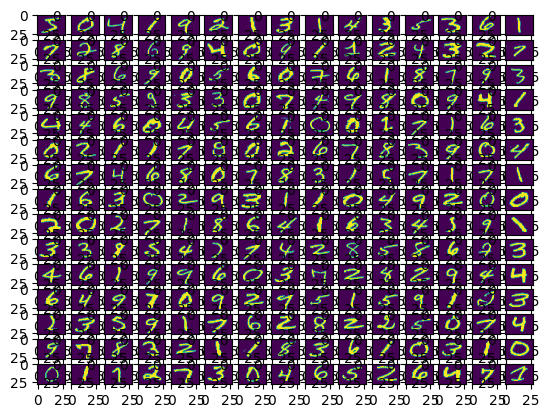

In [129]:
fig, ax = plt.subplots(15, 15)
k = 0
for i in range(15):
	for j in range(15):
		ax[i][j].imshow(x_train[k].reshape(28, 28),
						aspect='auto')
		k += 1
plt.show()

array([[<Axes: title={'center': 'battery_power'}>,
        <Axes: title={'center': 'blue'}>,
        <Axes: title={'center': 'clock_speed'}>,
        <Axes: title={'center': 'dual_sim'}>,
        <Axes: title={'center': 'fc'}>],
       [<Axes: title={'center': 'four_g'}>,
        <Axes: title={'center': 'int_memory'}>,
        <Axes: title={'center': 'm_dep'}>,
        <Axes: title={'center': 'mobile_wt'}>,
        <Axes: title={'center': 'n_cores'}>],
       [<Axes: title={'center': 'pc'}>,
        <Axes: title={'center': 'px_height'}>,
        <Axes: title={'center': 'px_width'}>,
        <Axes: title={'center': 'ram'}>,
        <Axes: title={'center': 'sc_h'}>],
       [<Axes: title={'center': 'sc_w'}>,
        <Axes: title={'center': 'talk_time'}>,
        <Axes: title={'center': 'three_g'}>,
        <Axes: title={'center': 'touch_screen'}>,
        <Axes: title={'center': 'wifi'}>],
       [<Axes: title={'center': 'price_range'}>, <Axes: >, <Axes: >,
        <Axes: >, <Axes: >]], 

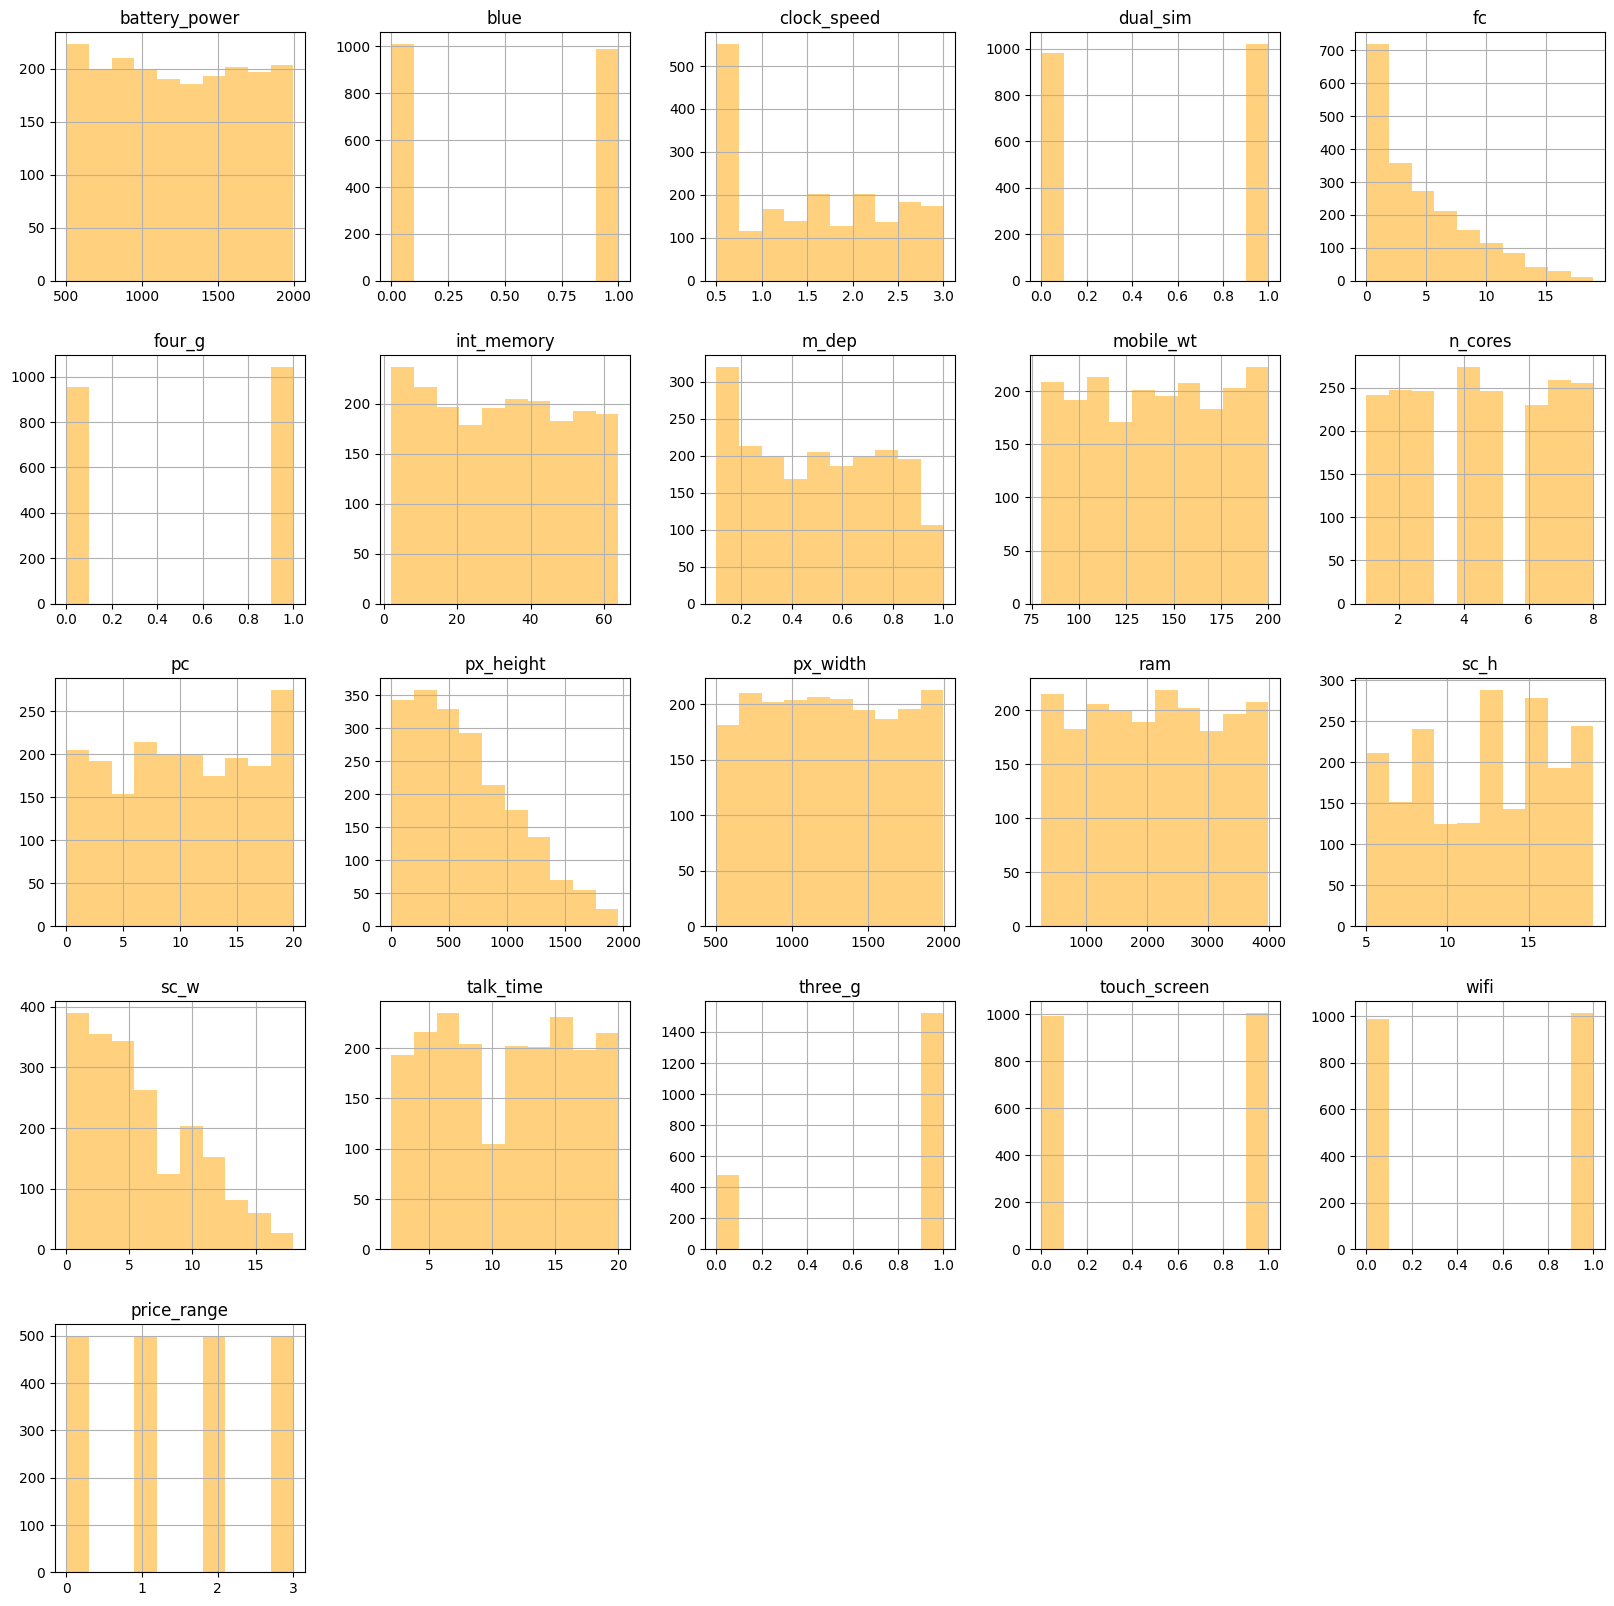

In [130]:
DS.hist(alpha=0.5, figsize=(20,20), color='orange')

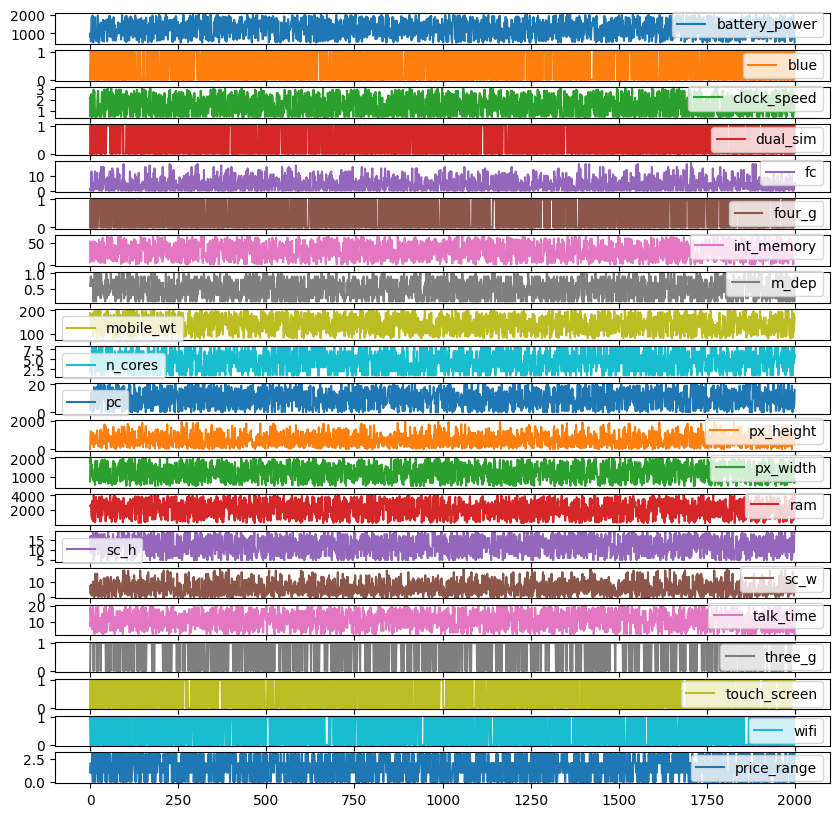

In [131]:
DS.plot(subplots=True, figsize=(10,10), sharex=False, sharey=False)
plt.show()

In [132]:
# Form the Input, hidden, and output layers.

model = Sequential([
	# reshape 28 row * 28 column data to 28*28 rows
	Flatten(input_shape=(28, 28)),
	# dense layer 1
	Dense(512, activation='relu'),
	# output layer
	Dense(10, activation='softmax'),
])

In [133]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_17 (Flatten)        (None, 784)               0         
                                                                 
 dense_46 (Dense)            (None, 512)               401920    
                                                                 
 dense_47 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [134]:
# Compiling the model
model.compile(optimizer='adam',
			loss='sparse_categorical_crossentropy',
			metrics=['accuracy'])

In [139]:
# Fit the model
model.fit(x_train, y_train, epochs=10,
		batch_size=2000,
		validation_split=0.2)

Epoch 1/10
24/24 [==============================] - 2s 104ms/step - loss: 0.0417 - accuracy: 0.9892 - val_loss: 0.0853 - val_accuracy: 0.9736
Epoch 2/10
24/24 [==============================] - 3s 135ms/step - loss: 0.0352 - accuracy: 0.9911 - val_loss: 0.0838 - val_accuracy: 0.9753
Epoch 3/10
24/24 [==============================] - 2s 98ms/step - loss: 0.0310 - accuracy: 0.9925 - val_loss: 0.0822 - val_accuracy: 0.9758
Epoch 4/10
24/24 [==============================] - 2s 93ms/step - loss: 0.0253 - accuracy: 0.9945 - val_loss: 0.0802 - val_accuracy: 0.9755
Epoch 5/10
24/24 [==============================] - 2s 97ms/step - loss: 0.0220 - accuracy: 0.9951 - val_loss: 0.0814 - val_accuracy: 0.9761
Epoch 6/10
24/24 [==============================] - 2s 100ms/step - loss: 0.0188 - accuracy: 0.9965 - val_loss: 0.0786 - val_accuracy: 0.9770
Epoch 7/10
24/24 [==============================] - 3s 140ms/step - loss: 0.0166 - accuracy: 0.9969 - val_loss: 0.0807 - val_accuracy: 0.9775
Epoch 8/1

In [138]:
# Accuracy of the Dataset Model
results = model.evaluate(x_test, y_test, verbose = 1)
print('test loss, test acc:', results)

313/313 [==============================] - 1s 3ms/step - loss: 0.0807 - accuracy: 0.9748
test loss, test acc: [0.08069278299808502, 0.9747999906539917]


In [137]:
# Loading the Dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data(path='/content/train.xls')

# Cast the records into float values
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# normalize image pixel values by dividing
# by 255
gray_scale = 255
x_train /= gray_scale # x_train = x_train/ 255
x_test /= gray_scale

# Form the Input, hidden, and output layers.

model = Sequential([

	# reshape 28 row * 28 column data to 28*28 rows
	Flatten(input_shape=(28, 28)),

	# dense layer 1
	Dense(512, activation='relu'),

	# dense layer 2
	Dense(256, activation='relu'),

	# output layer
	Dense(10, activation='softmax'),
])

# Compile the model

model.compile(optimizer='adam',
			loss='sparse_categorical_crossentropy',
			metrics=['accuracy'])

# Fit the model

model.fit(x_train, y_train, epochs=10,
		batch_size=2000,
		validation_split=0.2)

# Find the accuracy of the model

results = model.evaluate(x_test, y_test, verbose = 1)
print('test loss, test acc:', results)

Epoch 1/10
24/24 [==============================] - 3s 107ms/step - loss: 0.7991 - accuracy: 0.7933 - val_loss: 0.2971 - val_accuracy: 0.9149
Epoch 2/10
24/24 [==============================] - 2s 98ms/step - loss: 0.2677 - accuracy: 0.9211 - val_loss: 0.2107 - val_accuracy: 0.9398
Epoch 3/10
24/24 [==============================] - 2s 98ms/step - loss: 0.1941 - accuracy: 0.9435 - val_loss: 0.1698 - val_accuracy: 0.9521
Epoch 4/10
24/24 [==============================] - 3s 141ms/step - loss: 0.1504 - accuracy: 0.9573 - val_loss: 0.1476 - val_accuracy: 0.9578
Epoch 5/10
24/24 [==============================] - 2s 94ms/step - loss: 0.1220 - accuracy: 0.9664 - val_loss: 0.1266 - val_accuracy: 0.9630
Epoch 6/10
24/24 [==============================] - 2s 98ms/step - loss: 0.0998 - accuracy: 0.9725 - val_loss: 0.1125 - val_accuracy: 0.9660
Epoch 7/10
24/24 [==============================] - 2s 94ms/step - loss: 0.0830 - accuracy: 0.9770 - val_loss: 0.1043 - val_accuracy: 0.9689
Epoch 8/10
